In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
ds=pd.read_csv('ElectionData.csv')

In [4]:
ds.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [5]:
#checking the datatypes of tha columns
ds.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

1. only 2 object type columns
we need to handle these as this is a regression problem

In [6]:
#check the unique values in columns
for i in ds.columns:
    print("\033[1m"+i+"\033[0m",ds[i].unique())
    print('----------')

TimeElapsed [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265]
----------
time ['2019-10-06 20:10:02' '2019-10-06 20:15:02' '2019-10-06 20:20:02'
 '2019-10-06 20:25:02' '2019-10-06 20:30:02' '2019-10-06 20:35:02'
 '2019-10-06 20:40:02' '2019-10-06 20:45:02' '2019-10-06 20:50:01'
 '2019-10-06 20:55:01' '2019-10-06 21:00:01' '2019-10-06 21:05:01'
 '2019-10-06 21:10:01' '2019-10-06 21:15:02' '2019-10-06 21:20:02'
 '2019-10-06 21:25:02' '2019-10-06 21:30:01' '2019-10-06 21:35:01'
 '2019-10-06 21:40:02' '2019-10-06 21:45:02' '2019-10-06 21:50:01'
 '2019-10-06 21:55:01' '2019-10-06 22:00:02' '2019-10-06 22:05:02'
 '2019-10-06 22:10:01' '2019-10-06 22:15:01' '2019-10-06 22:20:02'
 '2019-10-06 22:25:01' '2019-10-06 22:30:01' '2019-10-06 22:35:01'
 '2019-10-06 22:40:02' '2019-10-06 22:45:01' '2019-10-06 22:50:01'
 '2019-10-06 22

1. time elapsed is at interval of 5 minutes
2. only categorical column in the dataset is province and party, we need to encode these

In [7]:
for i in ds.columns:
    print(i)
    print(ds[i].value_counts())
    print('---------------')

TimeElapsed
255    403
40     403
135    403
55     403
230    403
150    403
70     403
245    403
165    403
85     403
260    403
180    403
100    403
195    403
115    403
35     403
210    403
130    403
50     403
225    403
145    403
65     403
240    403
160    403
80     403
175    403
215    403
120    403
75     403
125    403
45     403
220    403
140    403
60     403
235    403
200    403
155    403
250    403
110    403
190    403
170    403
90     403
265    403
185    403
105    403
95     403
205    403
15     386
20     386
30     386
5      386
10     386
25     386
0      386
Name: TimeElapsed, dtype: int64
---------------
time
2019-10-06 22:55:02    403
2019-10-07 00:15:01    403
2019-10-06 23:00:01    403
2019-10-06 21:30:01    403
2019-10-07 00:20:02    403
2019-10-06 21:40:02    403
2019-10-06 20:55:01    403
2019-10-06 21:15:02    403
2019-10-06 23:10:02    403
2019-10-06 22:00:02    403
2019-10-06 22:15:01    403
2019-10-06 21:45:02    403
2019-10-06 21:05:

In [8]:
#check the number of rows and columns in the dataframe
ds.shape

(21643, 28)

the dataset has 21643 rows and 28 columns

In [9]:
#checking the null values in the dataset
print(ds.isna().sum())
print(ds.isnull().sum())

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64
TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates          

there are no null values in teh dataset

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
ds['territoryName']=le.fit_transform(ds['territoryName'])
ds['Party']=le.fit_transform(ds['Party'])
ds.drop('time',axis=1,inplace=True)

In [11]:
ds_corr=ds.corr()

check correlation of all teh columns in teh dataset with the target

In [12]:
ds_corr['FinalMandates']

TimeElapsed                -0.001007
territoryName               0.077042
totalMandates               0.264117
availableMandates           0.266764
numParishes                 0.329009
numParishesApproved         0.312177
blankVotes                  0.295583
blankVotesPercentage       -0.001195
nullVotes                   0.298663
nullVotesPercentage        -0.029659
votersPercentage            0.061048
subscribedVoters            0.295555
totalVoters                 0.294490
pre.blankVotes              0.294866
pre.blankVotesPercentage    0.005716
pre.nullVotes               0.297482
pre.nullVotesPercentage    -0.038686
pre.votersPercentage        0.050450
pre.subscribedVoters        0.296428
pre.totalVoters             0.295169
Party                       0.105097
Mandates                    0.814370
Percentage                  0.383086
validVotesPercentage        0.382744
Votes                       0.882502
Hondt                       0.994480
FinalMandates               1.000000
N

visualization of correlation using heatmap

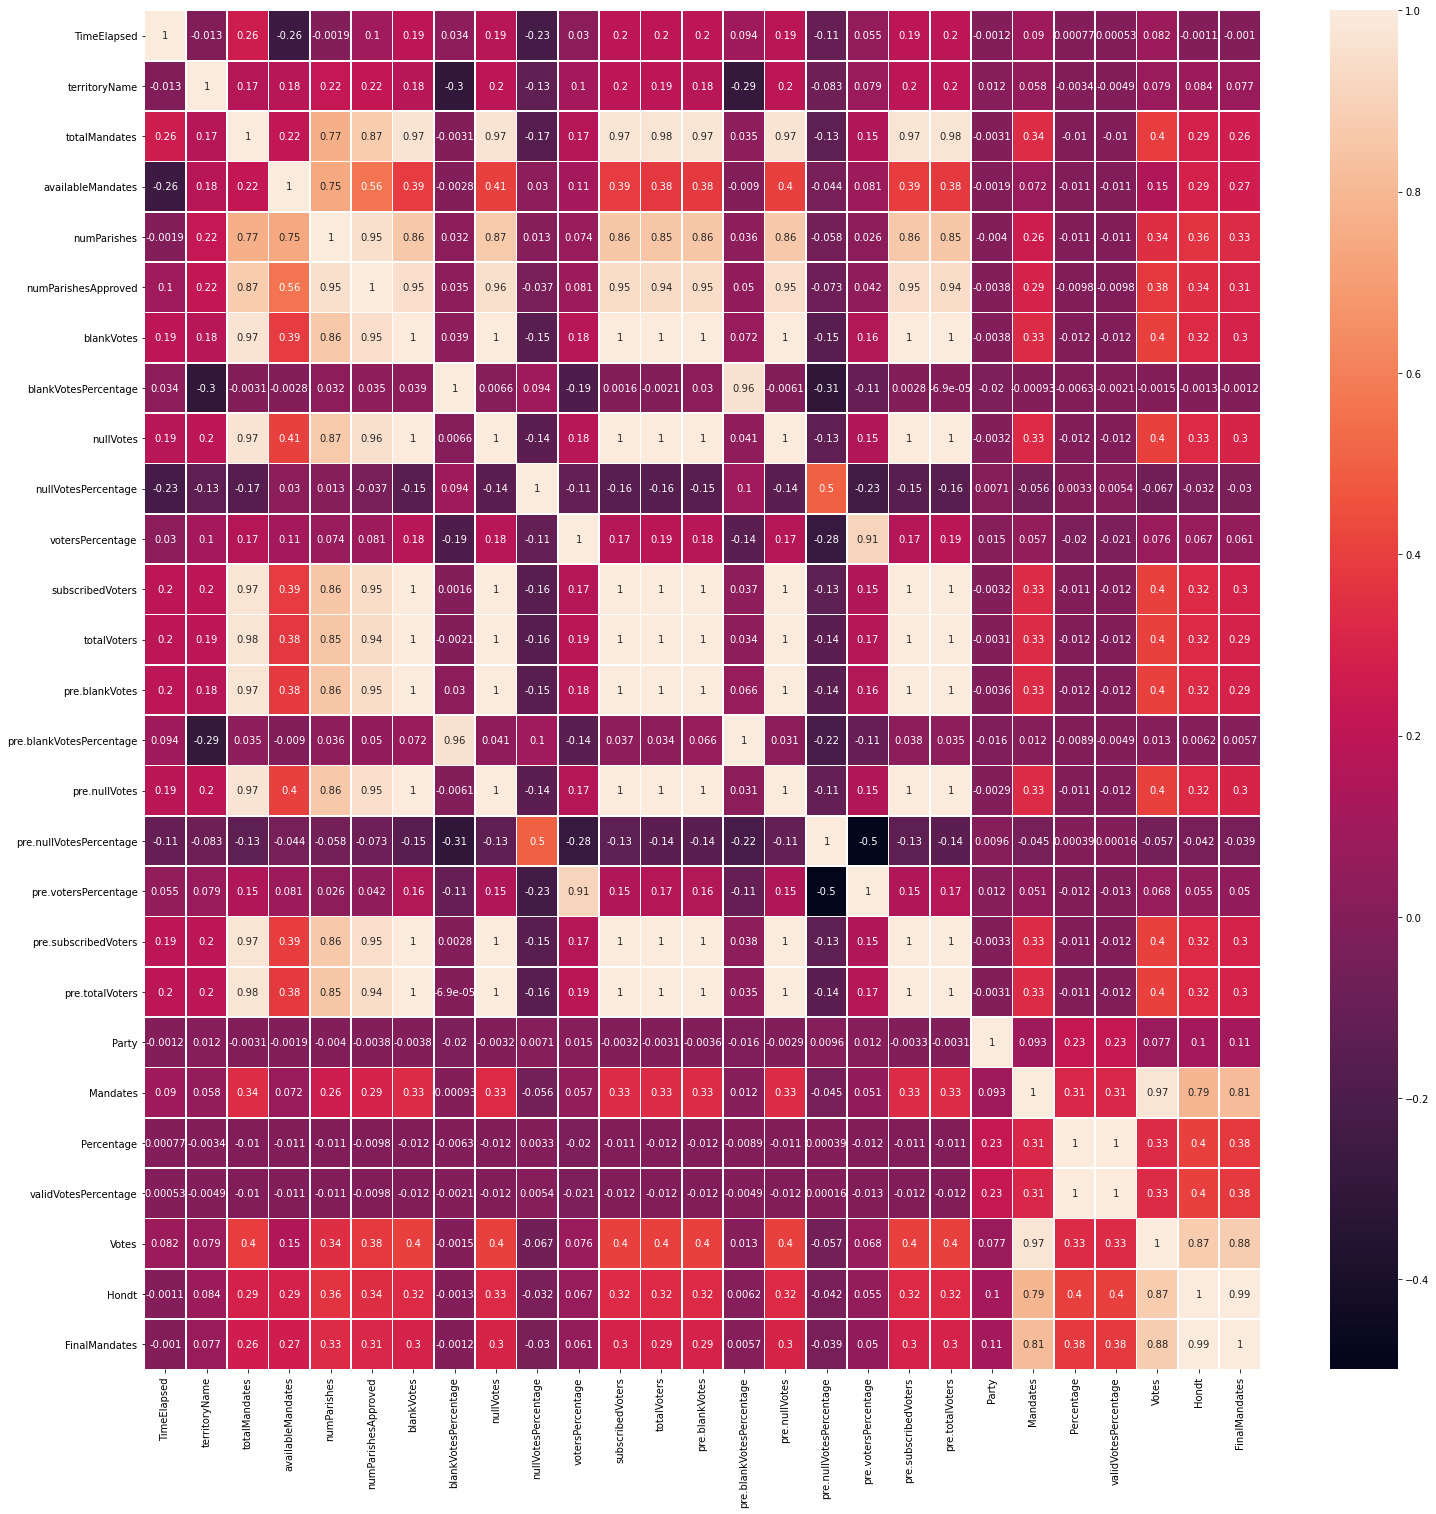

In [13]:
fig, ax=plt.subplots(figsize=(25,25))
sns.heatmap(ds.corr(),color='k',annot=True,linewidths=.5, ax=ax)

In [14]:
#dropping least correlated columns
ds.drop(['TimeElapsed','territoryName','blankVotesPercentage','votersPercentage','nullVotesPercentage','pre.blankVotesPercentage','pre.votersPercentage','pre.nullVotesPercentage','nullVotesPercentage'],axis=1,inplace=True)

In [15]:
ds.head()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,4.59,4.83,17757,11,12


In [16]:
print(ds.shape)
ds.corr()

(21643, 19)


,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
totalMandates,1.000000,0.217404,0.765877,0.873415,0.969988,0.967294,0.974407,0.976336,0.973357,0.969992,0.972976,0.975404,-0.003111,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,0.217404,1.000000,0.745472,0.562719,0.390638,0.407366,0.385828,0.379093,0.383877,0.399074,0.391272,0.383089,-0.001882,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,0.765877,0.745472,1.000000,0.954092,0.861279,0.870240,0.856855,0.850881,0.856779,0.864837,0.860782,0.853779,-0.004013,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.873415,0.562719,0.954092,1.000000,0.951265,0.956142,0.946191,0.940941,0.947190,0.951899,0.949110,0.943147,-0.003765,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.969988,0.390638,0.861279,0.951265,1.000000,0.998781,0.998297,0.997951,0.999657,0.997490,0.998487,0.998178,-0.003826,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
nullVotes,0.967294,0.407366,0.870240,0.956142,0.998781,1.000000,0.998988,0.998405,0.998883,0.999298,0.999296,0.998706,-0.003172,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
subscribedVoters,0.974407,0.385828,0.856855,0.946191,0.998297,0.998988,1.000000,0.999695,0.999145,0.999323,0.999954,0.999841,-0.003240,0.328197,-0.011276,-0.011548,0.404861,0.322750,0.295555
totalVoters,0.976336,0.379093,0.850881,0.940941,0.997951,0.998405,0.999695,1.000000,0.998888,0.998554,0.999515,0.999952,-0.003079,0.328836,-0.011560,-0.011856,0.404996,0.321587,0.294490
pre.blankVotes,0.973357,0.383877,0.856779,0.947190,0.999657,0.998883,0.999145,0.998888,1.000000,0.998383,0.999203,0.999085,-0.003586,0.327807,-0.011719,-0.011872,0.404458,0.321997,0.294866
pre.nullVotes,0.969992,0.399074,0.864837,0.951899,0.997490,0.999298,0.999323,0.998554,0.998383,1.000000,0.999499,0.998879,-0.002885,0.326680,-0.011332,-0.011607,0.404354,0.324854,0.297482


In [17]:
ds.head()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,4.59,4.83,17757,11,12


check distribution of the data
We can see that all teh data is skewed, we need to trate this skewness by using transforming techniques

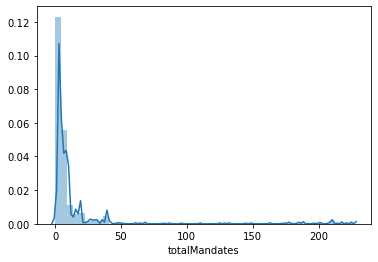

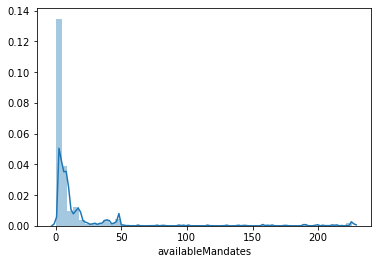

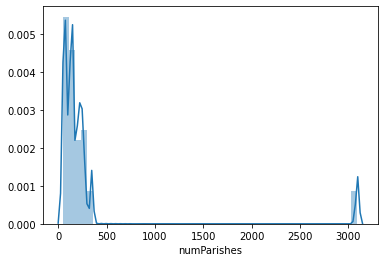

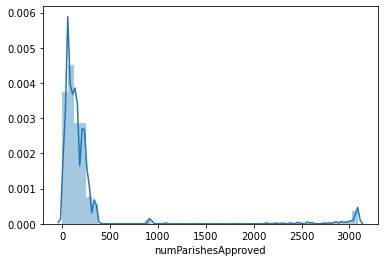

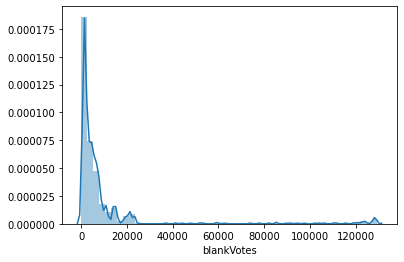

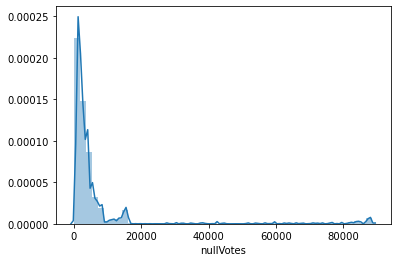

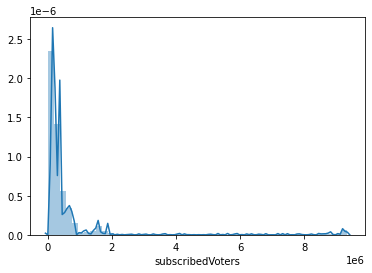

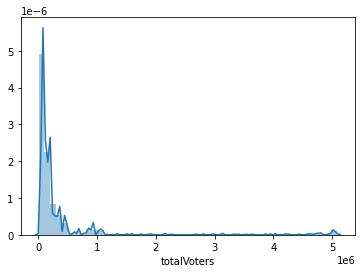

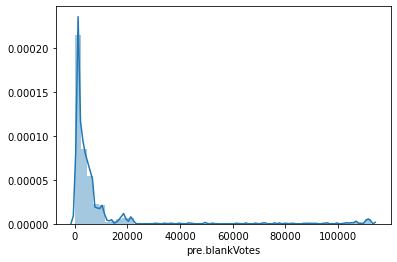

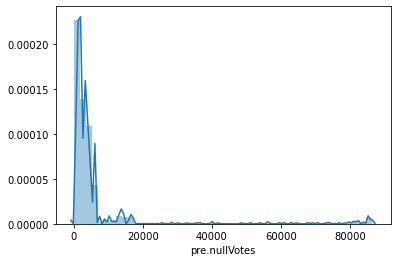

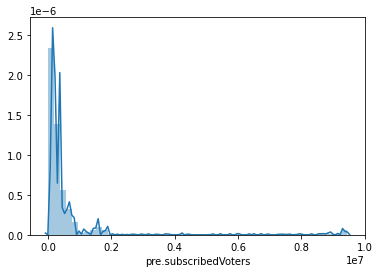

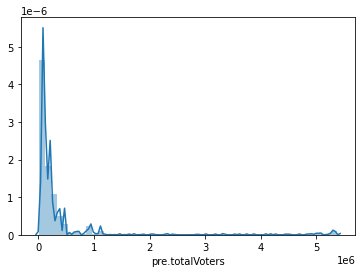

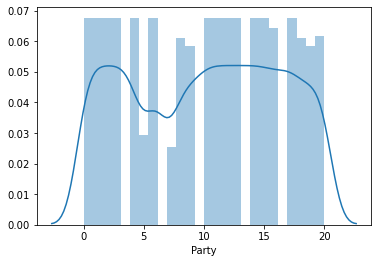

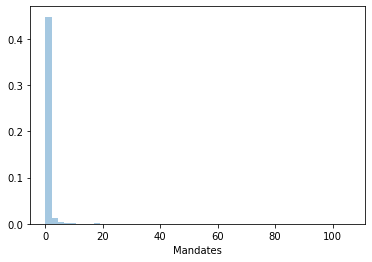

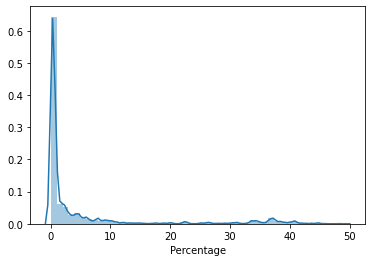

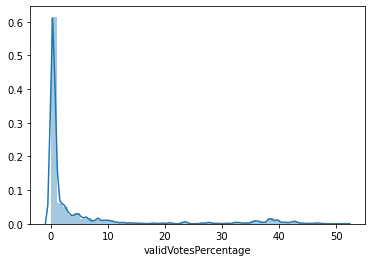

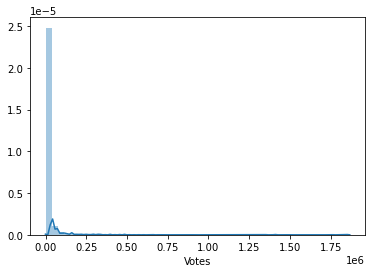

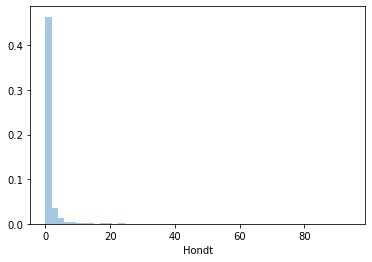

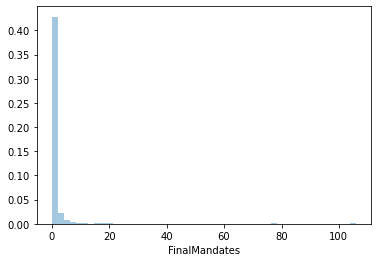

In [18]:
for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

check variation of each column with each other column

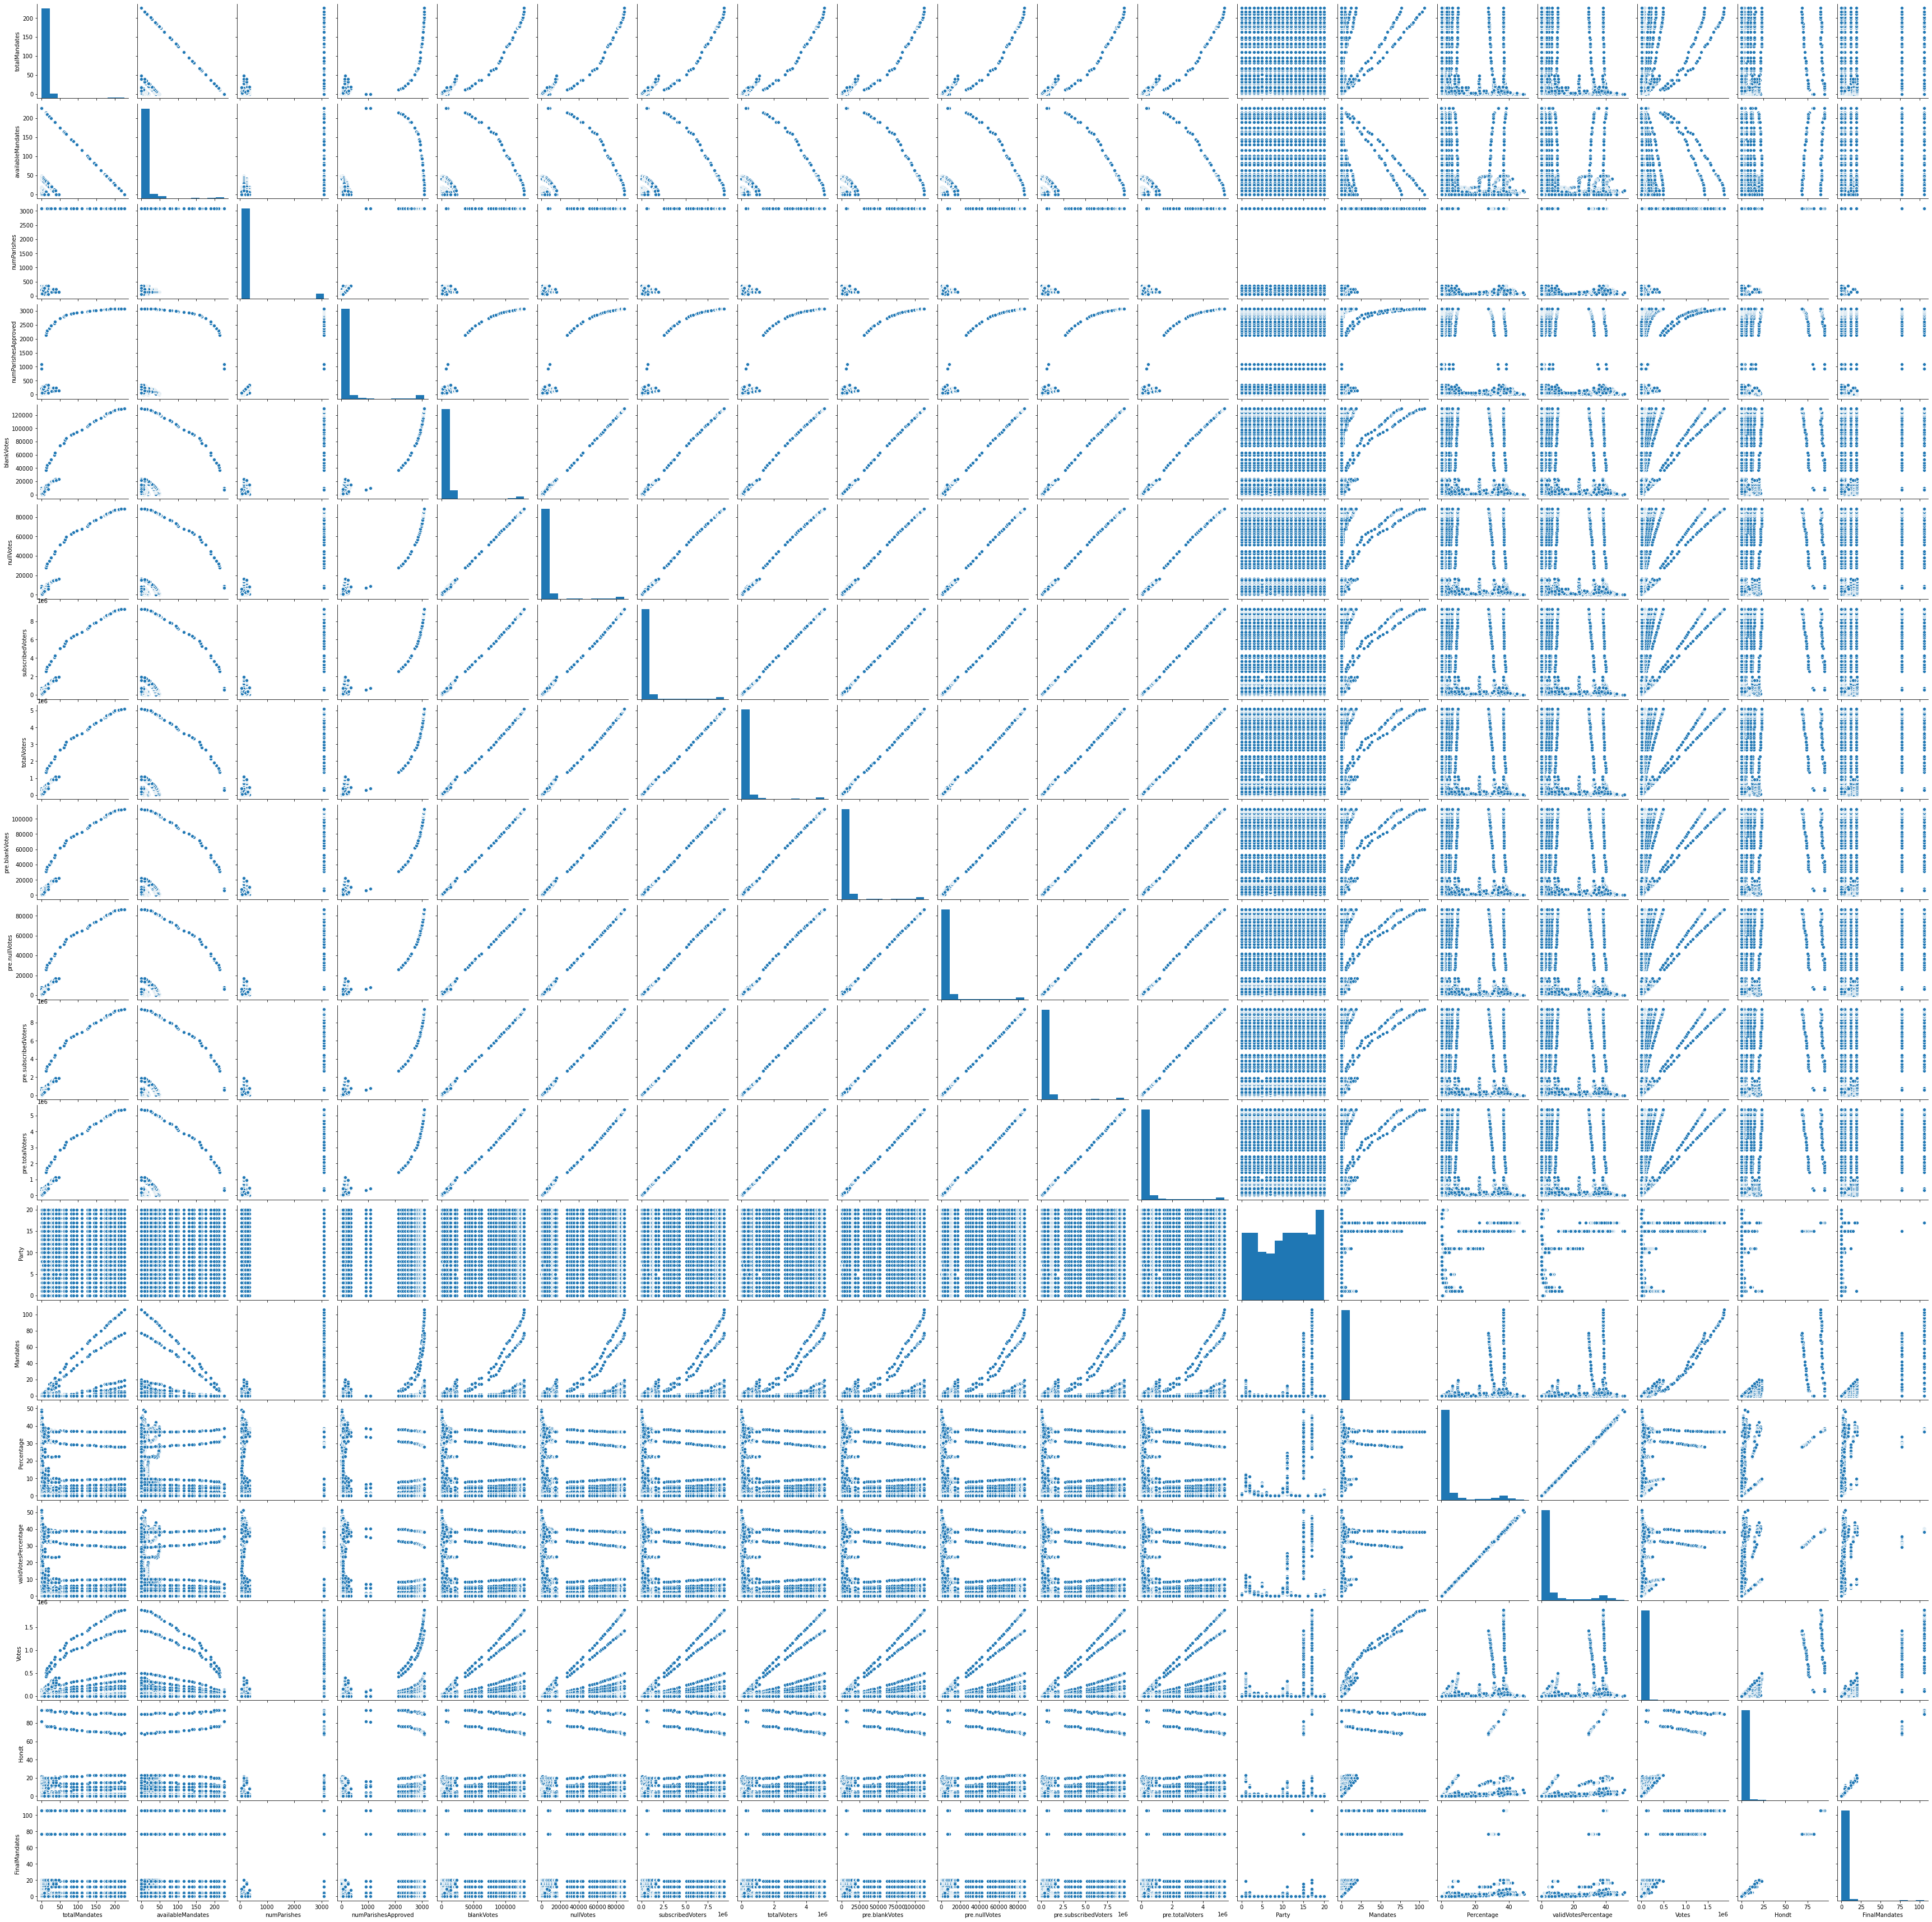

In [19]:
sns.pairplot(ds)

check teh outliers and remove them

In [20]:
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
ds_fin = ds.loc[(z_score<3).all(axis=1)]
print(ds_fin.shape)

(21643, 19)
(19419, 19)


In [21]:
ds_fin.skew()

totalMandates           2.616437
availableMandates       2.612975
numParishes             0.612966
numParishesApproved     0.626906
blankVotes              1.869760
nullVotes               2.171277
subscribedVoters        2.483897
totalVoters             2.548299
pre.blankVotes          2.109268
pre.nullVotes           2.405759
pre.subscribedVoters    2.445442
pre.totalVoters         2.546937
Party                   0.014371
Mandates                7.314039
Percentage              3.394151
validVotesPercentage    3.403814
Votes                   7.491860
Hondt                   7.177604
FinalMandates           6.896199
dtype: float64

divide data to transform and scale

In [22]:
x=ds_fin.iloc[:,0:-1]
y=ds_fin.iloc[:,-1]

In [23]:
x.head()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
22,0,16,147,12,186,101,11953,6371,124,111,12511,6826,17,0,34.33,35.95,2187,7
23,0,16,147,12,186,101,11953,6371,124,111,12511,6826,1,0,7.47,7.82,476,1
24,0,16,147,12,186,101,11953,6371,124,111,12511,6826,2,0,6.14,6.43,391,1
25,0,16,147,12,186,101,11953,6371,124,111,12511,6826,11,0,2.39,2.50,152,0
26,0,16,147,12,186,101,11953,6371,124,111,12511,6826,10,0,2.04,2.14,130,0


In [24]:
y.head()

22    7
23    2
24    1
25    0
26    0
Name: FinalMandates, dtype: int64

In [ ]:
scalaing teh data as regression problem

In [25]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ds_tran=pt.fit_transform(x)
ds_train=pd.DataFrame(ds_tran,columns=x.columns)

In [26]:
ds_train.head()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
0,-1.431224,1.30685,0.114092,-1.884911,-1.70614,-2.042241,-1.983878,-1.978371,-1.902402,-2.009163,-1.995605,-2.011105,1.133383,-0.268189,1.850620,1.849022,0.580502,2.841482
1,-1.431224,1.30685,0.114092,-1.884911,-1.70614,-2.042241,-1.983878,-1.978371,-1.902402,-2.009163,-1.995605,-2.011105,-1.544829,-0.268189,1.568721,1.564306,-0.188964,2.822131
2,-1.431224,1.30685,0.114092,-1.884911,-1.70614,-2.042241,-1.983878,-1.978371,-1.902402,-2.009163,-1.995605,-2.011105,-1.304814,-0.268189,1.496815,1.492662,-0.292029,2.822131
3,-1.431224,1.30685,0.114092,-1.884911,-1.70614,-2.042241,-1.983878,-1.978371,-1.902402,-2.009163,-1.995605,-2.011105,0.289707,-0.268189,0.973806,0.972468,-0.799061,-0.352937
4,-1.431224,1.30685,0.114092,-1.884911,-1.70614,-2.042241,-1.983878,-1.978371,-1.902402,-2.009163,-1.995605,-2.011105,0.137871,-0.268189,0.856347,0.858088,-0.884825,-0.352937


In [27]:
ds_test=y

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ds_train,ds_test,random_state=42,test_size=0.20)

In [29]:
print(x_train.shape)
print(y_train.shape)

(15535, 18)
(15535,)


In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
pred_lr=lr.predict(x_test)

In [32]:
r2_score(y_test,pred_lr)

0.5520030332143164

In [33]:
x1=ds_train
y1=ds_test

In [34]:
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    lr.fit(x1_train,y1_train)
    pred_lr = lr.predict(x1_test)
    x=r2_score(y1_test,pred_lr)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [35]:
print(r2_scr,random_state)

0.5721709436819024 94


very less score in linear regression, hence trying random forest regressor for better accuracy

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
r2_scr_rfr = 0
random_state_rfr=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=i)
    rfr.fit(x1_train,y1_train)
    pred_rfr = rfr.predict(x1_test)
    x=r2_score(y1_test,pred_rfr)
    if x>r2_scr_rfr:
        r2_scr_rfr = x
        random_state_rfr=i
print(r2_scr_rfr,random_state_rfr)
print(r2_score(y1_test,pred_rfr))

0.9999820542895901 42
0.9989721066294559


In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,x1,y1,cv=5,scoring='r2').mean()

0.9869682574768378

In [38]:
x2=ds_train
y2=ds_test

In [41]:
#finalize and save the model
import joblib
joblib.dump(rfr,'election.pkl')

['election.pkl']

In [43]:
pd.DataFrame(pred_rfr).to_csv('election.csv')

In [44]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .20,random_state=42)

In [45]:
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(15535, 18)
(15535,)
(3884, 18)
(3884,)


In [48]:
rfr.fit(x1_train,y1_train)
rfr_pred = rfr.predict(x1_test)
r2_score(y1_test,rfr_pred)

0.9999919945884427

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr,x1,y1,cv=5,scoring='r2').mean()

0.987385350018093

In [50]:
#finalize and save the model
import joblib
joblib.dump(rfr,'election.pkl')

['election.pkl']

In [52]:
pd.DataFrame(rfr_pred).to_csv('election1.csv')